In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [2]:
make_circles?

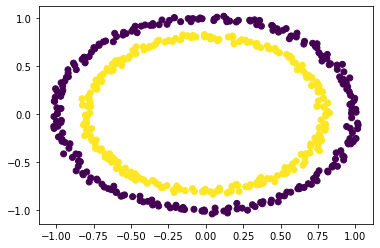

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [6]:
X_ = phi(X)

(500, 3)


In [8]:
X[:3,:]

array([[ 0.61556133, -0.77501112],
       [-0.84381844, -0.49854445],
       [ 0.91353288,  0.51589328]])

In [9]:
X_[:3,:]

array([[ 0.61556133, -0.77501112,  0.97955798],
       [-0.84381844, -0.49854445,  0.96057613],
       [ 0.91353288,  0.51589328,  1.10068819]])

In [19]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

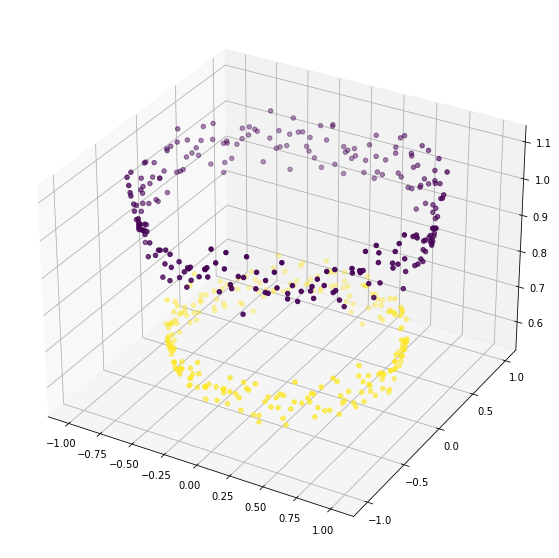

In [20]:
ax = plot3d(X_)

## Logistic Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [22]:
lr=LogisticRegression()

In [32]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.2000


## Logistic Classifier on Higher Dimension Space

In [33]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 100.0000


## Visualise the Decision Surface

In [34]:
lr.fit(X_,Y)

LogisticRegression()

In [35]:
wts = lr.coef_
print(wts)

[[-1.17030236e-02 -2.23946390e-03 -1.08919477e+01]]


In [36]:
bias = lr.intercept_

In [37]:
bias

array([8.90269578])

In [38]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [39]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81992505 0.81885058 0.81777611 0.81670165]
 [0.81971944 0.81864497 0.81757051 0.81649604]
 [0.81951383 0.81843937 0.8173649  0.81629043]
 [0.81930822 0.81823376 0.81715929 0.81608483]]


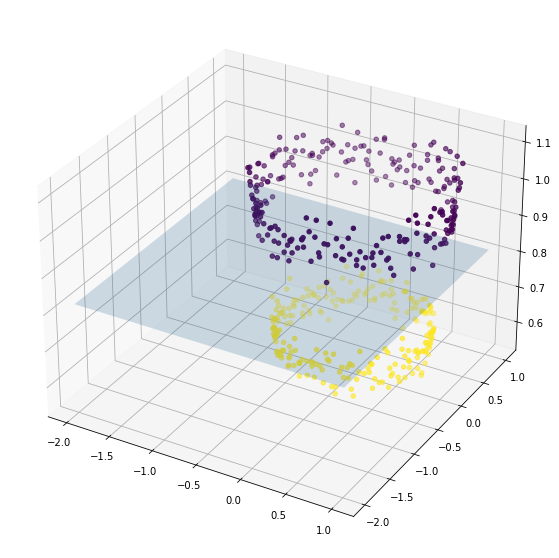

In [40]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's

In [41]:
from sklearn import svm

In [42]:
svc = svm.SVC(kernel="linear")
svc.fit(X,Y)
svc.score(X,Y)

0.51

In [43]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [44]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.588

In [45]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [46]:
svc = svm.SVC(kernel="sigmoid")
svc.fit(X,Y)
svc.score(X,Y)

0.5

# MNIST Classification¶
## Grid Search for Best Hyperparameters

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [48]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }   
]

In [49]:
data = load_digits()
X = data.data
Y  = data.target
print(X.shape,Y.shape)

(1797, 64) (1797,)


### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [51]:
lr = LogisticRegression()
lr.fit(X,Y)
cross_val_score(lr,X,Y,scoring="accuracy",cv=5).mean()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9137650882079852

### svm

In [52]:
from sklearn import svm

In [66]:
svc = svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

0.9632838130609718

### Right Set of Parameters !

In [62]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs = -1)

In [61]:
GridSearchCV?

In [63]:
gs.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [67]:
gs.best_estimator_

SVC(C=5.0)

In [65]:
gs.best_score_

0.9738502011761063